### EE 564B Homework 1
### Random Search + Gradient Descent Algorithms

Text(0.5, 0, 'value of $u$')

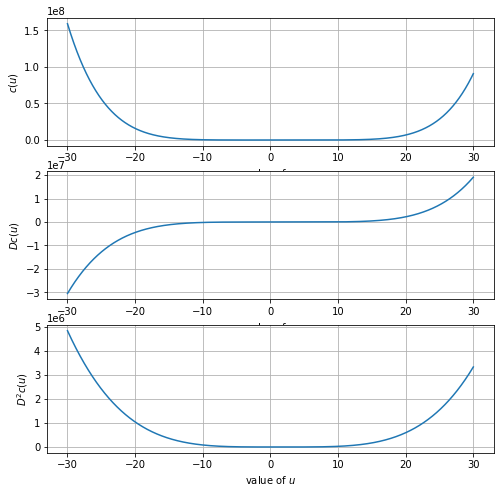

In [1]:
import numpy as np
import pylab as plt
import scipy as sp
from scipy import linalg as la
import scipy.optimize as opt
import scipy.stats as stats
from scipy.misc import derivative
%matplotlib inline

# Set figure properties
figsize = (8,8)
fig = plt.figure(figsize=figsize)

# Define function
def c(u): return u**6/6.0-7*u**5/5.0+17*u**4/4.0-17*u**3/3.0+3*u**2
def Dc(u): return derivative(c,u, dx=0.0001)
def DDc(u): return derivative(Dc,u, dx=0.0001)

u = np.linspace(-30,30,10000)
ax1 = plt.subplot(3,1,1); ax1.grid('on')
ax1.plot(u,c(u))
ax1.set_ylabel('$c(u)$')
ax1.set_xlabel('value of $u$')

ax2 = plt.subplot(3,1,2); ax2.grid('on')
ax2.plot(u,Dc(u))
ax2.set_ylabel('$Dc(u)$')
ax2.set_xlabel('value of $u$')

ax3 = plt.subplot(3,1,3); ax3.grid('on')
ax3.plot(u,DDc(u))
ax3.set_ylabel('$D^2c(u)$')
ax3.set_xlabel('value of $u$')

In [5]:
[u_min, c_min,success,iter] = opt.fminbound(c, 0, 6, full_output=True)
print("Approach 1: Using fminbound function:")
print("The minimum c is:    ","%0.6f" % c_min)
print("The minimizing u is: ","%0.6f\n" % u_min)

u_min = u[0]
for u_tmp in u:
  if abs(Dc(u_tmp))<abs(Dc(u_min)) and DDc(u_tmp)>0:
    u_min = u_tmp
print("Approach 2: Based on Dc(u) and D^2c(u) values:")
print("The minimum c is:    ","%0.6f" % c(u_min))
print("The minimizing u is: ","%0.6f\n" % u_min)

u_min = u[0]
for u_tmp in u:
  if c(u_tmp)<c(u_min):
    u_min = u_tmp
print("Approach 3: Directly compare c(u) values:")
print("The minimum c is:    ","%0.6f" % c(u_min))
print("The minimizing u is: ","%0.6f\n" % u_min)

Approach 1: Using fminbound function:
The minimum c is:     0.000000
The minimizing u is:  0.000005

Approach 2: Based on Dc(u) and D^2c(u) values:
The minimum c is:     0.350000
The minimizing u is:  1.005101

Approach 3: Directly compare c(u) values:
The minimum c is:     -0.449956
The minimizing u is:  2.997300



Run the (***simple random search***) iteration

$$ u^+ = u - \frac{\gamma}{N \Delta} \sum_{n = 1}^N ( c(u + \Delta u_n) - c(u) ) \cdot u_n,\ u_n \sim \mathcal{N}(u,\sigma^2) $$

starting from multiple initial $u$'s and with multiple values of the parameters $\gamma, \Delta, \sigma > 0$, where $\mathcal{N}(u,\sigma^2)$ denotes a ***normal*** or ***Gaussian*** distribution with mean $u$ and variance $\sigma^2$.  Describe all of the outcomes (i.e. asymptotic behavior of the iteration) you observe and provide plots that illustrate these outcomes.  How should $\sigma$ relate to $\gamma$, $\Delta$?


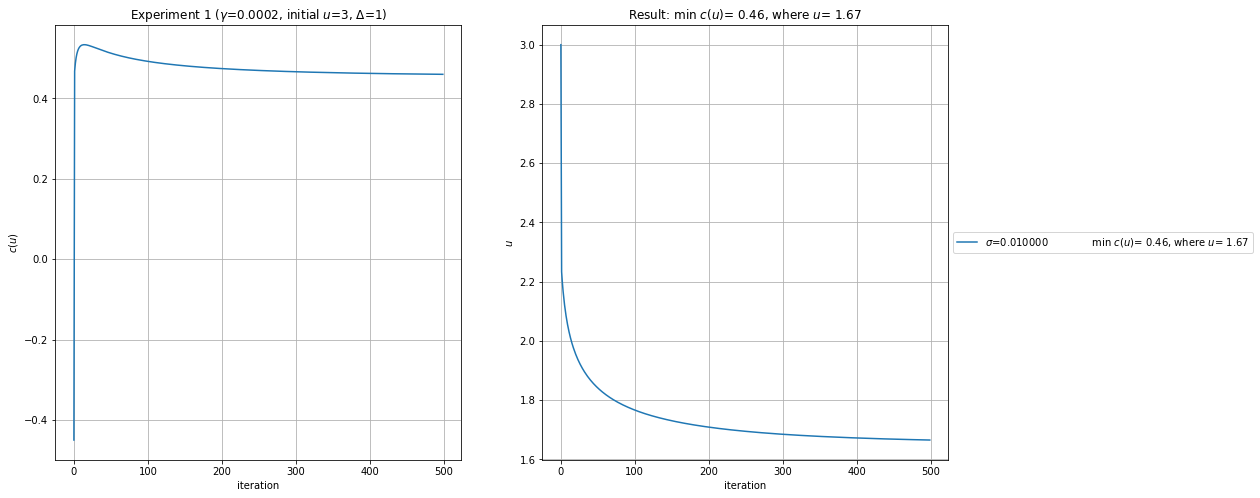

In [18]:
# Parameter settings
N = 100
max_iter_list = [500]
r_list = [2e-4]
u_init_list = [3]
delta_list = [1]
sigma_list = [1e-2]

# Define simple random search function
def d_gauss(u,sigma,delta): 
  un = np.random.normal(u, sigma, N)
  c_exp = 0
  for i in range(N):
    c_exp = c_exp + (c(u+delta*un[i]) - c(u))*un[i]
  c_exp = c_exp/(N*delta)
  return c_exp

# Start experiments
for exp in range(len(r_list)):

  # Load display stuff
  figsize = (16,8)
  plt.figure(figsize=figsize)
  ax1 = plt.subplot(len(r_list),2,1); ax1.grid('on')
  ax2 = plt.subplot(len(r_list),2,2); ax2.grid('on')

  # Initialization settings
  max_iter = max_iter_list[exp]
  r = r_list[exp]
  delta = delta_list[exp]

  u_descent = [0 for i in range(max_iter)]
  c_descent = [0 for i in range(max_iter)]
  u_descent[0] = u_init_list[exp]
  c_descent[0] = c(u_descent[0])

  u_best = u_descent[0]
  c_best = c_descent[0]
  sigma_best = sigma_list[0]
  
  # Set delta value
  for sigma in sigma_list:
    # Calculate interative update results
    for i in range(max_iter-1):
      u_plus = u_descent[i] - r*d_gauss(u_descent[i],sigma,delta)
      u_descent[i+1] = u_plus
      c_descent[i+1] = c(u_plus)
    
    # Compare results
    if c_descent[max_iter-1]<c_best:
      u_best = u_descent[max_iter-1]
      c_best = c_descent[max_iter-1]
      sigma_best = sigma

    # Draw results
    ax1.plot(range(max_iter),c_descent)
    if r/delta>sigma:
      ax2.plot(range(max_iter),u_descent, label="$\sigma$="+"%0.6f" % sigma+
               " (${\gamma}/{\Delta}$>$\sigma$)    min $c(u)$= "+str("%0.2f" % c_descent[max_iter-1])+
               ', where $u$= '+str("%0.2f" % u_descent[max_iter-1]))
    else:
      ax2.plot(range(max_iter),u_descent, label="$\sigma$="+"%0.6f" % sigma+
               "              min $c(u)$= "+str("%0.2f" % c_descent[max_iter-1])+
               ', where $u$= '+str("%0.2f" % u_descent[max_iter-1]))


# Add text on plots
  ax1.set_ylabel('$c(u)$')
  ax1.set_xlabel('iteration')
  ax1.set_title('Experiment '+str(exp+1)+' ($\gamma$='+str(r)+', initial $u$='+str(u_descent[0])+', $\Delta$='+str(delta)+')')

  ax2.set_ylabel('$u$')
  ax2.set_xlabel('iteration')  
  # ax2.set_title('Result: best $\Delta$= '+str("%0.6f" % delta_best))
  ax2.set_title('Result: min $c(u)$= '+str("%0.2f" % c_descent[max_iter-1])+', where $u$= '+str("%0.2f" % u_descent[max_iter-1]))

  # ax2.set_title('Result: best $\sigma$= '+str("%0.6f" % sigma_best))
  ax2.legend(loc="center left", bbox_to_anchor=(1,0.5))